In [1]:
import numpy as np
import scipy.io as sio
import glob
from sklearn import linear_model
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
from itertools import cycle
from scipy.optimize import curve_fit
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.stats import sem
from scipy import stats
from scipy import ndimage
import pystan
from matplotlib import cm
import pyprind
%matplotlib inline

color_cycle = cycle(['g', 'b', 'c', 'm', 'y', 'k'])

import warnings
warnings.simplefilter("ignore")


import matplotlib as mpl
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'large'

%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

color_cycle = cycle(['g', 'b', 'c', 'm', 'y', 'k'])


import sys
sys.path.append('C:\\Users\\adamimos\\Documents\\GitHub\\ASAC\\python')
from import_rat_data import *
from behavior_analysis import *
#from decoder_functions import *

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import cv2
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import cross_validate

In [2]:
file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\RetinotopicMapping\\Adam0_20190705.pickle",'rb')
data = pickle.load(file)
file.close()   

In [3]:
shown_pattern_inds = np.concatenate([x[:-1] for x in data['completed_trials_data']['pattern_inds']])

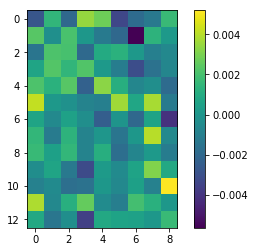

In [4]:
# Plot the average of all generated screens
plt.imshow(np.mean(data['all_data']['patterns'],0))
# plt.caxis(-1,1)
plt.colorbar()

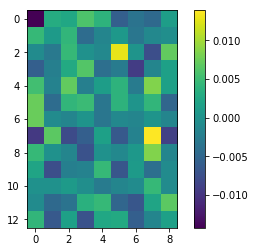

In [5]:
# Plot the average of all generated screens
plt.imshow(np.mean(data['all_data']['patterns'][shown_pattern_inds],0))
# plt.caxis(-1,1)
plt.colorbar()

In [6]:
# find frame of every shown pattern
pi = np.array([x[:-1] for x in data['completed_trials_data']['pattern_inds']])
ssf = data['completed_trials_data']['frame_info']['stim_start_frame']
traces = data['all_data']['traces']
pat_shape = np.array(data['completed_trials_data']['patterns'][0]).shape
pattern_trace = np.zeros((pat_shape[0],pat_shape[1],traces.shape[1]))
print(pattern_trace.shape)
frame_start_pattern = []


for i in range(len(ssf)):
    patt_frames_ = []
    sf = ssf[i]
    patt_ = np.repeat(pi[i],3)
    for j in range(len(patt_)):
        pattern_trace[:,:,sf+j]=data['all_data']['patterns'][patt_[j],:,:]


'''
for i in range(len(ssf)):
    patt_frames_ = []
    sf = ssf[i]
    for j in range(len(pi[i])): #  go through the number of shown things
        if np.mod(j,2)==0:
            pattern_trace[:,:,sf+j*2+j/2] = data['all_data']['patterns'][pi[i][j]]
            pattern_trace[:,:,sf+j*2+j/2+1] = data['all_data']['patterns'][pi[i][j]]
            pattern_trace[:,:,sf+j*2+j/2+2] = pattern_trace[:,:,sf+j*2+j/2+2]+0.5*data['all_data']['patterns'][pi[i][j]]
        else:
            pattern_trace[:,:,sf+j*2+int(j/2)] = pattern_trace[:,:,sf+j*2+int(j/2)] + 0.5*data['all_data']['patterns'][pi[i][j]]
            pattern_trace[:,:,sf+j*2+int(j/2)+1] = data['all_data']['patterns'][pi[i][j]]
            pattern_trace[:,:,sf+j*2+int(j/2)+2] = data['all_data']['patterns'][pi[i][j]]
     
    0       1        2      3          4
    1 1 0.5|0.5 1 1 | 1 1 0.5|0.5 1 1 | 1 1 0.5|0.5 1 1 
    0 1    2    3 4   5 6    7    8 9   10 11  12   13
    ''';

(13, 9, 36705)


In [ ]:
pattern_trace[:,:,sf]

In [ ]:
plt.plot(pattern_trace[1,2,:])

In [ ]:
n = n+1
w = traces[n,:]
w = w/np.max(w)
#w = np.clip(w-0.5,0,0.5)*2
print(np.sum(w))
fig = plt.figure(figsize=(20,10))

k=1
patts = pattern_trace
for i in np.arange(-10,10):
    plt.subplot(4,5,k)
    plt.imshow(np.dot(patts,np.roll(w,i)));
    #plt.colorbar();
    k=k+1

In [ ]:
n = n
w = traces[n,:]
w = w/np.max(w)
#w = np.clip(w-0.5,0,0.5)*2
print(np.sum(w))
fig = plt.figure(figsize=(20,10))

k=1
patts = pattern_trace<0
for i in np.arange(-20,0):
    plt.subplot(4,5,k)
    plt.imshow(np.dot(patts,np.roll(w,i)));
    #plt.colorbar();
    k=k+1

In [ ]:
pattern_trace.shape

In [ ]:
np.where(pattern_trace[1,1,:]==-1)

In [7]:
ix,iy,it = pattern_trace.shape
on_frames = []
off_frames = []
for i in range(ix):
    on_frames_ = []
    off_frames_ = []
    for j in range(iy):
        on_frames_.append(np.where(pattern_trace[i,j,:]==1)[0])
        off_frames_.append(np.where(pattern_trace[i,j,:]==-1)[0])
        
    on_frames.append(on_frames_)
    off_frames.append(off_frames_)
    


In [219]:
on_avs = []
off_avs = []
offset = 7
for i in range(ix):
    on_avs_ = []
    off_avs_ = []
    for j in range(iy):
        on_avs_.append(np.mean(traces[:,on_frames[i][j]]+offset,axis=1))
        off_avs_.append(np.mean(traces[:,off_frames[i][j]]+offset,axis=1))
    on_avs.append(on_avs_)
    off_avs.append(off_avs_)
        
on_avs = np.array(on_avs)
off_avs = np.array(off_avs)

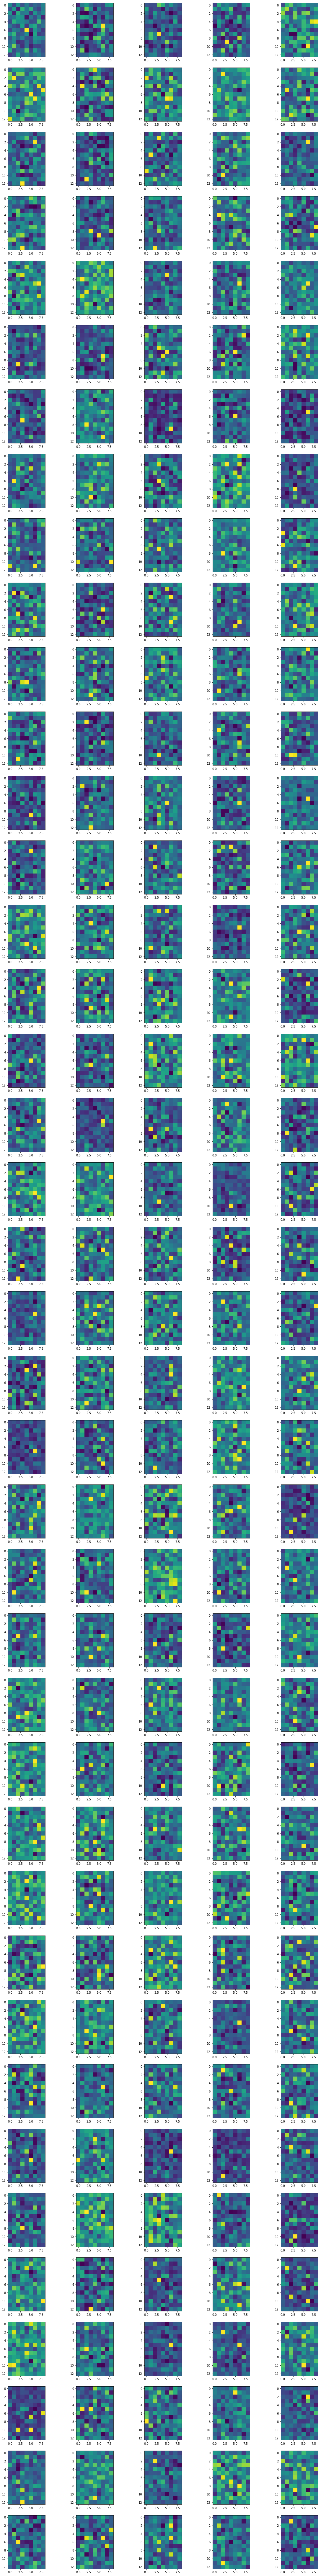

In [19]:
fig = plt.figure(figsize=(20,160))

k=1
for i in np.arange(0,200):
    plt.subplot(40,5,k)
    plt.imshow(on_avs[:,:,i])
    #plt.colorbar();
    k=k+1

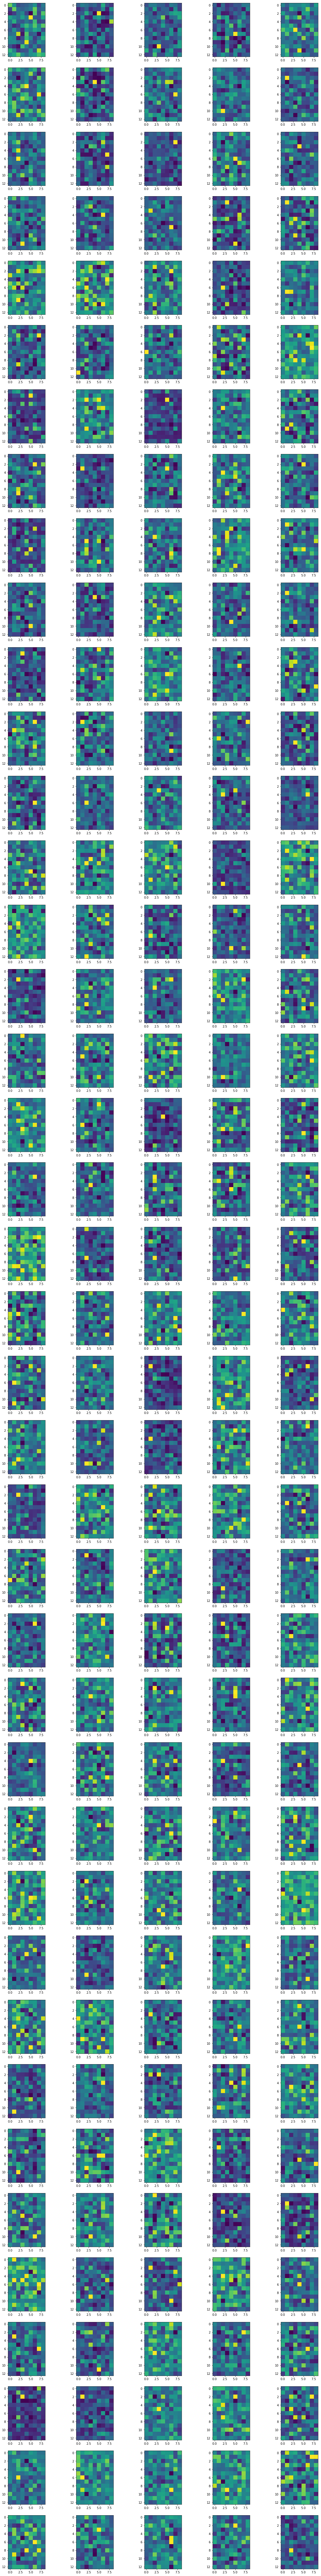

In [27]:
fig = plt.figure(figsize=(20,160))

k=1
for i in np.arange(0,200):
    plt.subplot(40,5,k)
    plt.imshow(off_avs[:,:,i])
    #plt.colorbar();
    k=k+1

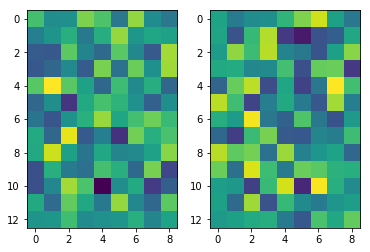

In [241]:
N = N+1
plt.subplot(1,2,1)
plt.imshow(on_avs[:,:,N])
plt.clim(np.min(np.min(on_avs[:,:,N])),np.max(np.max(on_avs[:,:,N])))
plt.subplot(1,2,2)
plt.imshow(off_avs[:,:,N])
plt.clim(np.min(np.min(on_avs[:,:,N])),np.max(np.max(on_avs[:,:,N])))

In [149]:
len(off_frames[1][2])

246